In [4]:
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, MaxPool2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [5]:
train_set = pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/aug_train_label.csv')    # reading the csv file
train_set.head() 

,Image,Id,Risk of Macular Edema
0,20051019_38557_0100_PP.tif_0_1898.tif,2,0
1,20051019_38557_0100_PP.tif_0_3322.tif,2,0
2,20051019_38557_0100_PP.tif_0_4844.tif,2,0
3,20051019_38557_0100_PP.tif_0_5319.tif,2,0
4,20051019_38557_0100_PP.tif_0_687.tif,2,0


In [3]:
train_image = []

for i in tqdm(range(train_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/aug_train/' + train_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 5760/5760 [31:16<00:00,  3.07it/s]


In [6]:
test_set =  pd.read_csv('/content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/test.csv')    # reading the csv file
test_set.head() 

,Image,Id,Risk of macular edema
0,20060410_44464_0200_PP.tif,0,0
1,20051213_61892_0100_PP.tif,0,0
2,20051020_53062_0100_PP.tif,3,2
3,20051116_58835_0400_PP.tif,3,1
4,20051214_51811_0100_PP.tif,3,1


In [8]:
test_image = []

for i in tqdm(range(test_set.shape[0])):
    img = image.load_img('../content/drive/MyDrive/Mtech Project/Dataset/Augmented Messidor*5/test/' + test_set['Image'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

Y = np.array(test_image)

100%|██████████| 240/240 [02:07<00:00,  1.89it/s]


In [9]:
y = np.array(train_set.drop(['Image', 'Id'],axis=1))
y.shape

(5760, 1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5184, 224, 224, 3)
(576, 224, 224, 3)
(5184, 1)
(576, 1)


In [19]:
resnet50_model = Sequential()

model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=4,
                   weights='imagenet')

for layer in model.layers:
        layer.trainable=False

resnet50_model.add(model)

In [20]:
resnet50_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
resnet50_model.add(Flatten())
resnet50_model.add(Dense(512, activation='relu'))
resnet50_model.add(Dense(4, activation='softmax'))
resnet50_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [23]:
resnet50_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
print("Hyperparameters : {} \n".format(resnet50_model.optimizer.get_config()))

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 



In [24]:
history = resnet50_model.fit(X_train, y_train,
          batch_size=4,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/5
1296/1296 [==============================] - 943s 725ms/step - loss: 0.6319 - accuracy: 0.8148 - val_loss: 0.5392 - val_accuracy: 0.8403
Epoch 2/5
1296/1296 [==============================] - 921s 710ms/step - loss: 0.5978 - accuracy: 0.8187 - val_loss: 0.5483 - val_accuracy: 0.8403
Epoch 3/5
1296/1296 [==============================] - 928s 716ms/step - loss: 0.5976 - accuracy: 0.8187 - val_loss: 0.5367 - val_accuracy: 0.8403
Epoch 4/5
1296/1296 [==============================] - 934s 721ms/step - loss: 0.5955 - accuracy: 0.8187 - val_loss: 0.5470 - val_accuracy: 0.8403
Epoch 5/5
1296/1296 [==============================] - 931s 718ms/step - loss: 0.5942 - accuracy: 0.8187 - val_loss: 0.5408 - val_accuracy: 0.8403


In [25]:
score = resnet50_model.evaluate(X_test, y_test, verbose=0)
print("Hyperparameters : {} \n".format(resnet50_model.optimizer.get_config()))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Hyperparameters : {'name': 'Adam', 'learning_rate': 0.001, 'decay': 0.0, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False} 

Test loss: 0.5407941341400146
Test accuracy: 0.8402777910232544


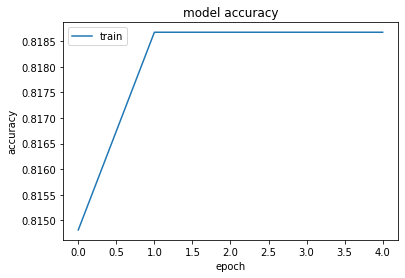

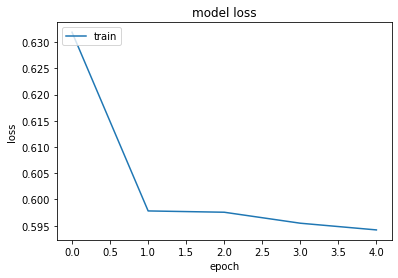

In [26]:
#Plotting the graph of accuracy VS epoch
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

#Plotting the graph of loss VS epoch
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()